![alt text](fgv_logo_novo.jpg)

# Machine Learning

### Random Forests

Antes de falar de Random Forests vamos entender Decision Trees.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

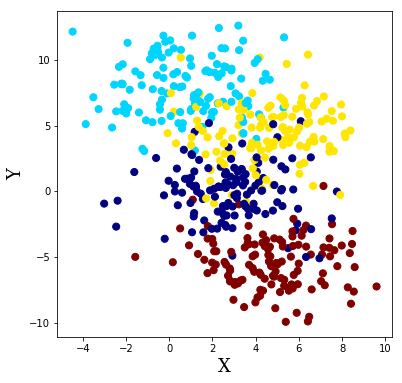

In [2]:
# Criando datasets
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4, random_state=88, cluster_std=2.1)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c = y, s = 50, cmap='jet')

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }

plt.xlabel('X', fontdict=font);
plt.ylabel('Y', fontdict=font);

# fig.set_xlabel('xlabel')
# fig.set_ylabel('ylabel')

# plt.scatter(X[:,0], X[:,1], s = 150, cmap='jet', alpha=0.1)

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
# função extraída do curso Udemy - Jose Portilla - disponível em
# https://www.udemy.com/learning-python-for-data-analysis-and-visualization/learn/v4/t/lecture/2338236?start=0

def visualize_tree(classifier, X, y, 
                   boundaries=True,
                   xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
    
    plt.xlabel('X', fontdict=font);
    plt.ylabel('Y', fontdict=font);
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

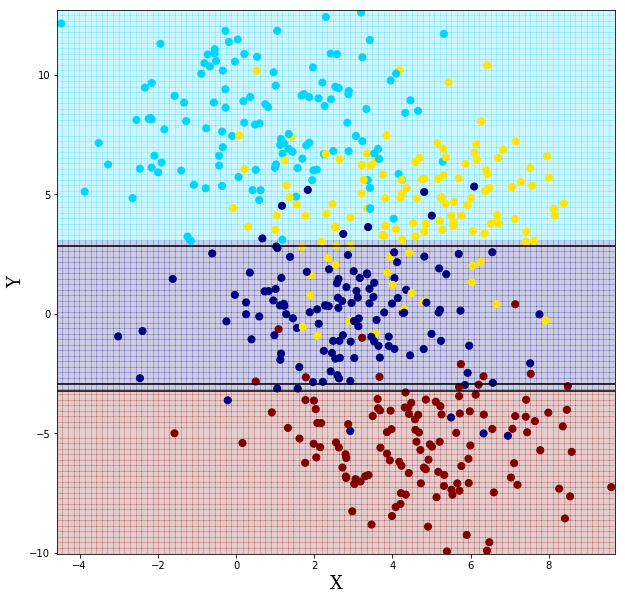

In [29]:
clf = DecisionTreeClassifier(max_depth=2, random_state=20, )

visualize_tree(clf, X, y)

In [18]:
# formula calculo gini
def gini(lst):
    soma = sum(lst)
    return 1 - sum([(e/soma) ** 2 for e in lst])

In [19]:
no_raiz = np.bincount(y)
print('Gini de', no_raiz,':', gini(no_raiz))

Gini de [125 125 125 125] : 0.75


In [20]:
# exemplos de gini index para os nós e para os splits:
# http://dni-institute.in/blogs/gini-index-work-out-example/

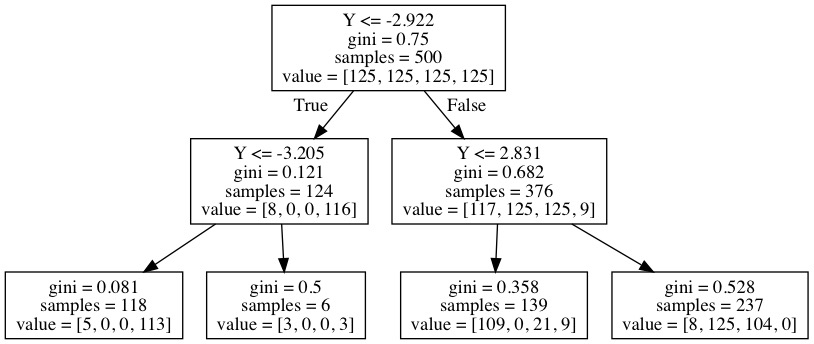

In [30]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file='aula.dot', feature_names=['X', 'Y']) 
graph = pydotplus.graph_from_dot_file('aula.dot') 
graph.write_jpg('decisiontree_depth_1.jpg')

from IPython.display import Image 
Image('decisiontree_depth_1.jpg')

In [36]:
no_esq = [0, 125, 0, 2]
print('Gini de', no_esq,':', round(gini(no_esq), 5))
no_dir = [125, 0, 125, 123]
print('Gini de', no_dir,':', round(gini(no_dir), 5))

Gini de [0, 125, 0, 2] : 0.031
Gini de [125, 0, 125, 123] : 0.66665


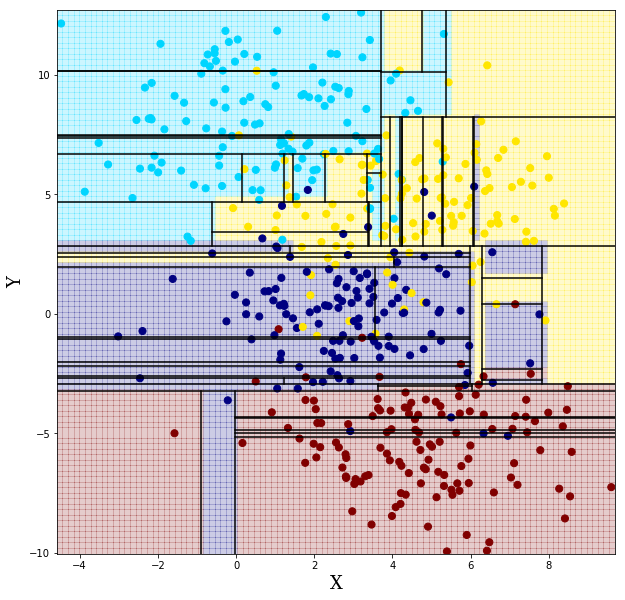

In [28]:
clf = DecisionTreeClassifier(max_depth=8, random_state = 99)

visualize_tree(clf, X, y)

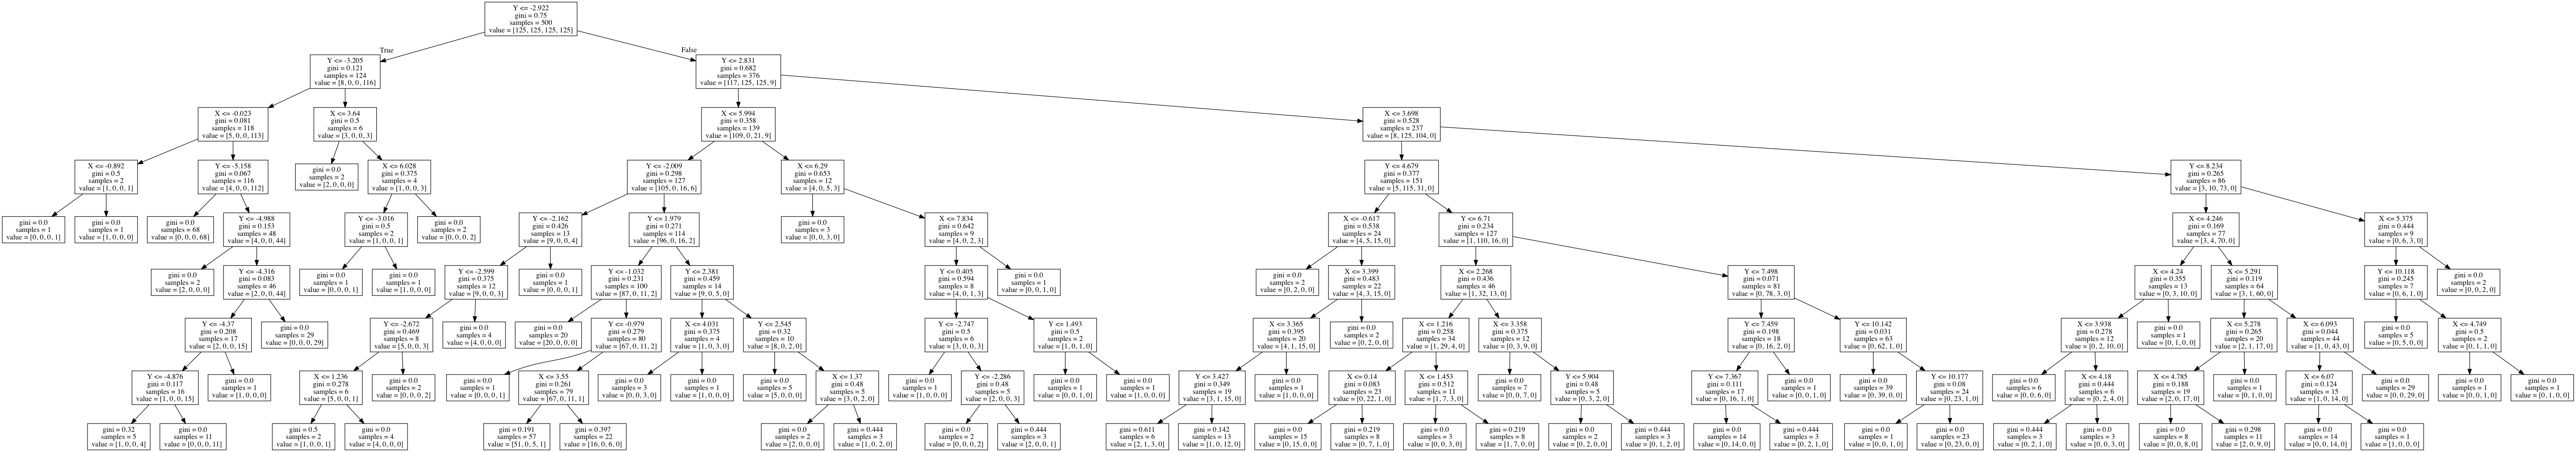

In [38]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file='aula.dot', feature_names=['X', 'Y']) 
graph = pydotplus.graph_from_dot_file('aula.dot') 
graph.write_jpg('decisiontree_depth_2.jpg')

from IPython.display import Image 
Image('decisiontree_depth_2.jpg')

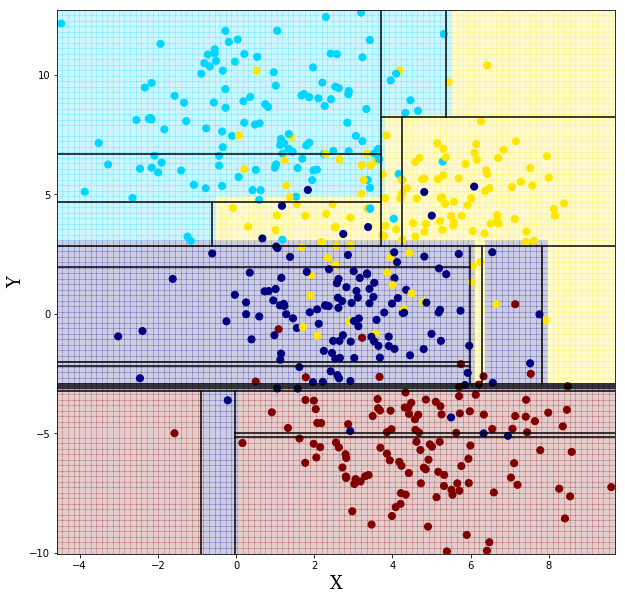

In [35]:
clf = DecisionTreeClassifier(random_state=1000, max_depth=5, )

visualize_tree(clf, X, y)

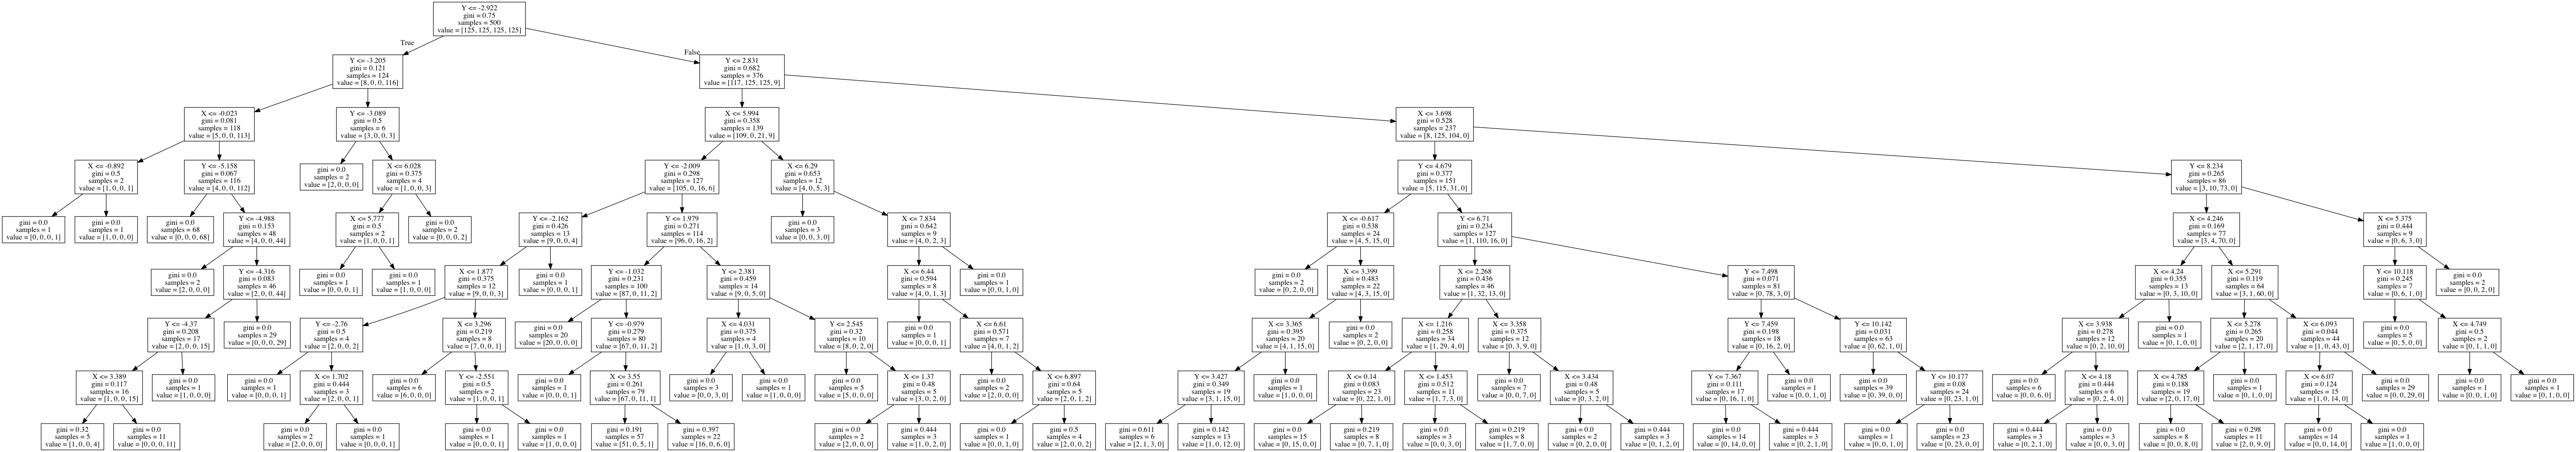

In [40]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file='aula.dot', feature_names=['X', 'Y']) 
graph = pydotplus.graph_from_dot_file('aula.dot') 
graph.write_jpg('decisiontree_depth_4.jpg')

from IPython.display import Image 
Image('decisiontree_depth_4.jpg')

Sinais de over-fitting: Muitas decisões de quebra levando a grupos muito granulares.

In [41]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# search = GridSearchCV(clf, param_grid={'max_depth': [1,2,3,4,6,7,8], 
#                                        'min_sample_split':[10,50,100]})

# randomized = RandomizedSearchCV(clf, )

## Random Forests

Metodo baseado em ensemble, ou seja reune 'opiniões' de vários classificadores e tira-se a média das estimativas.
Esses classificadores são classificadores fracos (weak learners), e são assim denominados por que tem apenas uma visão parcial dos fatos. No Random Forests, os weak learners são decision trees, daí o termo 'forests' para o ensemble.

Por exemplo, se dois classificadores tem entradas muito correlacionadas, os resultados terão alta variancia, pois reagirão de maneira parecida aos dados. Veja que podemos estabelecer um paralelo com o caso de entradas muito correlacionadas no leave-one-out CV.
Assim, uma das idéias surgidas para melhorar as arvores de decisão, foi impor uma parcialidade aleatórea forçada para cada classificador fraco, técnica chamada de *bagging*(\*). Datasets artificiais, ou pseudo-datasets são montados para cada classificador fraco. 

(\*) sklearn tem implementado classificadores *bagging* via a classe [BaggingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier). Esse classificador implementa escolha aleatória de observações e de features, com ou sem reposição para diferentes árvores. Cada árvore é alimentada com um pseudo-dataset diferente, e todas as quebras de nó dessa árvore seguem os principios apresentados anteriormente para árvores de decisão. Ou seja, com o numero de classificadores ```n_estimators = 10```: ```10``` pseudo-datasets e ```10``` árvores são montadas, cada pseudo-dataset alimentando uma árvore diferente. E cada quebra de nó em cada arvore observa todo o dataset disponível em busca da melhor quebra. O *bagging* utiliza o *boostrapping*, uma técnica de reamostragem com reposição.  

Na busca de um método ainda mais aleatório (que permita reduzir ainda mais a variancia sem comprometer o bias), 
o Random Forest vai além.
No Random Forests, uma outra parcialidade dos fatos é imposta **a cada quebra** do nó (\*\*). Nas arvores de decisão, cada quebra leva em consideração todas as features existentes na busca da melhor quebra. Enquanto que no algoritmo de Random Forests, observaremos apenas uma fração das features. Por exemplo, $\sqrt{N}$ ao invés de $N$ features. 

(\*\*) Existe uma sutil diferença entre (a) escolha aleatória de features a cada quebra do nó, e (b) uma escolha aleatória de features para cada árvore. Entendemos que o mecanismo proposto por Leo Breiman (veja https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#overview e https://www.quora.com/Does-random-forest-select-a-subset-of-features-for-every-tree-or-every-node) refere-se a (a), embora frequentemente encontremos na Internet descrições relativas a (b).

Essas duas técnicas induzem a classificadores menos correlacionados entre si, e acabam por reduzir a variancia, quando agrupadas num ensemble. Essas idéias introduzidas nesse algoritmo representam alternativas mais robustas (menor variancia sem incremento de bias) as tecnicas de poda e redução de complexidade empregadas em árvores de decisão.

    

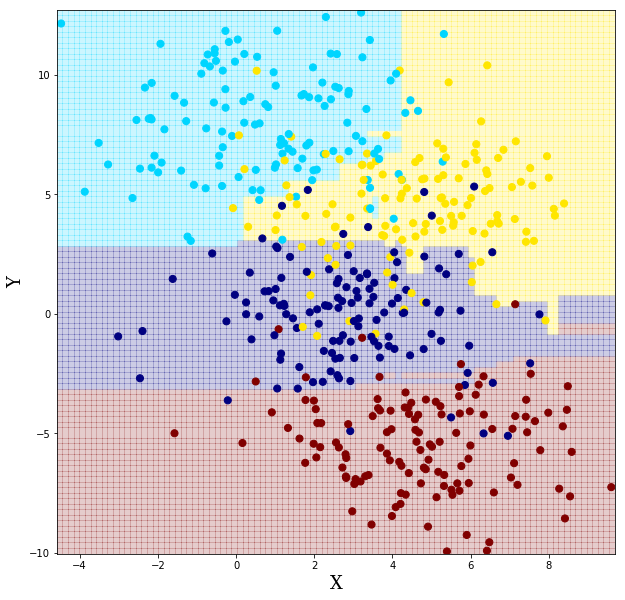

In [36]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=10,random_state=0, 
                         max_depth=5, min_samples_split=10, n_jobs=-1)

# As bordas entre regiões adquirem contornos mais 'suaves'
# quebrando a dicotomia inerente ao algoritmo de arvore de decisão.
visualize_tree(clf,X,y,boundaries=False)

## métricas

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
%matplotlib inline

In [21]:
y_pred = clf.predict(X)

##### acurácia

In [22]:
print (accuracy_score(y, y_pred))

0.97


##### matriz de confusão

In [23]:
confusion_matrix(y, y_pred)

array([[121,   0,   2,   2],
       [  0, 125,   0,   0],
       [  1,   0, 119,   5],
       [  1,   0,   4, 120]])

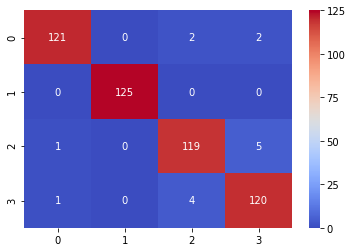

In [24]:
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap = 'coolwarm')

##### precision, recall e f1-score 
para cada label

In [25]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98       125
          1       1.00      1.00      1.00       125
          2       0.95      0.95      0.95       125
          3       0.94      0.96      0.95       125

avg / total       0.97      0.97      0.97       500



In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

f1_score(y, y_pred, average = 'weighted')

0.9700468509984639

## Boosting Trees

Método baseado em ensemble de arvores, mas de maneira iterativa, ou seja as arvores são treinadas sequencialmente. No primeiro passo, a arvore é treinada com os labels de treinamento. No passo seguinte, uma nova arvore é treinada, onde os labels serão os erros residuais do passo anterior. Sucessivamente, arvores são treinadas a partir de resíduos do passo anterior, até que um critério de parada seja atingido. 

Na predição, todas as arvores treinadas são consultadas com pesos descrescentes, assim calibrando a influencia de cada arvore na predição final. As primeiras arvores tem peso maior, enquanto que nas ultimas um peso menor.

Aqui vamos utilizar a implementação do scikit learn. Outras implementações existentes são:
* [XGBoost](http://xgboost.readthedocs.io/en/latest/)
* [LightGBM](https://github.com/Microsoft/LightGBM)

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

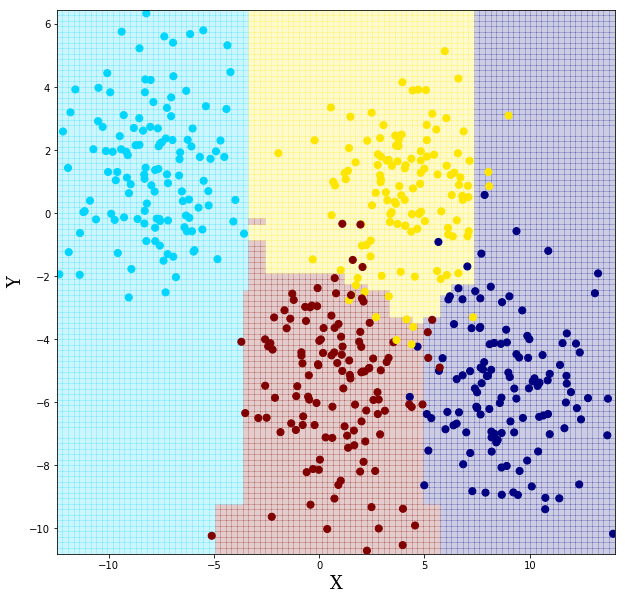

In [28]:
clf = GradientBoostingClassifier(n_estimators=25,random_state=0, 
                             max_depth=2, min_samples_split=250)

visualize_tree(clf,X,y,boundaries=False)

#### Exercicio
Gerar novos blobs de teste e ver qual argoritmo apresentou melhor desempenho

In [ ]:
from sklearn.datasets import make_blobs

X_test, y_test = make_blobs(n_samples=100, centers=4, random_state=808, cluster_std=2.1)

### Referencias

Texto interessante: [Random Forests](https://medium.com/@josemarcialportilla/enchanted-random-forest-b08d418cb411) 